# [매매패턴 분석] 데이터 군집화 수행 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pickle

# 한글깨짐 방지위해 폰트 변경 
plt.rcParams['font.family']="gulim"

## 1. 파일 읽기
    -  계좌번호는 String 형태로 읽어옴. 

In [2]:
data = pd.read_csv('MIS_preDone.sql', encoding='euc-kr', converters={'계좌번호':str})
data

,계좌번호,매수체결금액,매수종목개수,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결건수,최종수익률(실현+평가),매수체결시간_시작마감,매수체결금액_Scale,매수종목개수_Scale,매수체결건수_Scale
0,72041675,666834599868,301,0.359653,0.980931,0.792911,5658,0.396497,0.802208,1.000000,0.728041,0.768141
1,70496239,640095504960,547,0.473103,0.901218,0.833608,7967,0.499830,0.837952,0.878276,0.787154,0.784352
2,80398717,551103425918,515,0.452423,0.900675,0.816469,7515,0.419804,0.865303,0.842945,0.780915,0.781671
3,80932051,423949975995,568,0.295517,0.763795,0.911268,12534,0.563517,0.858807,0.823780,0.792020,0.797788
4,71358313,404760403698,569,0.365649,0.911843,0.927688,9148,0.447465,0.831196,0.821758,0.792271,0.792634
...,...,...,...,...,...,...,...,...,...,...,...,...
166995,68345480,4023330,14,0.610290,0.272635,0.386533,40,1.586078,0.711433,0.123119,0.418444,0.377359
166996,71047476,4013950,3,0.905928,0.165199,0.165199,39,-2.382939,1.000000,0.120692,0.284490,0.371118
166997,68629208,3929230,15,0.651290,0.499312,0.629659,34,-9.597224,0.934905,0.000000,0.425975,0.325799
166998,68781251,3707725,8,1.000000,0.108557,0.514903,33,2.257179,0.735471,0.000000,0.361617,0.309885


## 2. 군집분석 수행

In [3]:
# 군집분석에 사용할 변수만 추출하여 새로운 데이터셋에 담기 
ana_data = data.iloc[:, [3,4,5,8,10,11]]
ana_data

,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시간_시작마감,매수종목개수_Scale,매수체결건수_Scale
0,0.359653,0.980931,0.792911,0.802208,0.728041,0.768141
1,0.473103,0.901218,0.833608,0.837952,0.787154,0.784352
2,0.452423,0.900675,0.816469,0.865303,0.780915,0.781671
3,0.295517,0.763795,0.911268,0.858807,0.792020,0.797788
4,0.365649,0.911843,0.927688,0.831196,0.792271,0.792634
...,...,...,...,...,...,...
166995,0.610290,0.272635,0.386533,0.711433,0.418444,0.377359
166996,0.905928,0.165199,0.165199,1.000000,0.284490,0.371118
166997,0.651290,0.499312,0.629659,0.934905,0.425975,0.325799
166998,1.000000,0.108557,0.514903,0.735471,0.361617,0.309885


### 2.1 K-means 군집분석
    - kmeans 군집분석 함수 만들기

In [4]:
##############################
# KMeans 군집분석 
##############################

def cluster_learn(data):
    kmeans2  = KMeans(n_clusters=2,random_state=200).fit(data)
    kmeans3  = KMeans(n_clusters=3,random_state=200).fit(data)
    kmeans4  = KMeans(n_clusters=4,random_state=200).fit(data)
    kmeans5  = KMeans(n_clusters=5,random_state=200).fit(data)
    kmeans6  = KMeans(n_clusters=6,random_state=200).fit(data)
    kmeans7  = KMeans(n_clusters=7,random_state=200).fit(data)
    kmeans8  = KMeans(n_clusters=8,random_state=200).fit(data)
    kmeans9  = KMeans(n_clusters=9,random_state=200).fit(data)
    kmeans10 = KMeans(n_clusters=10,random_state=200).fit(data)
    kmeans11 = KMeans(n_clusters=11,random_state=200).fit(data)
    kmeans12  = KMeans(n_clusters=12,random_state=200).fit(data)
    kmeans13  = KMeans(n_clusters=13,random_state=200).fit(data)
    kmeans14  = KMeans(n_clusters=14,random_state=200).fit(data)
    kmeans15  = KMeans(n_clusters=15,random_state=200).fit(data)
    kmeans16  = KMeans(n_clusters=16,random_state=200).fit(data)
    kmeans17  = KMeans(n_clusters=17,random_state=200).fit(data)
    kmeans18  = KMeans(n_clusters=18,random_state=200).fit(data)
    kmeans19  = KMeans(n_clusters=19,random_state=200).fit(data)
    kmeans20 = KMeans(n_clusters=20,random_state=200).fit(data)
    
    
    return kmeans2, kmeans3, kmeans4, kmeans5, kmeans6, kmeans7, kmeans8, kmeans9, kmeans10, kmeans11,kmeans12, kmeans13, kmeans14, kmeans15, kmeans16, kmeans17, kmeans18, kmeans19, kmeans20



def elbow_search():
    sse=[]
    sseDF = pd.DataFrame()
    
    sse.append(kmeans2.inertia_)
    sse.append(kmeans3.inertia_)
    sse.append(kmeans4.inertia_)
    sse.append(kmeans5.inertia_)
    sse.append(kmeans6.inertia_)
    sse.append(kmeans7.inertia_)
    sse.append(kmeans8.inertia_)
    sse.append(kmeans9.inertia_)
    sse.append(kmeans10.inertia_)
    sse.append(kmeans11.inertia_)
    sse.append(kmeans12.inertia_)
    sse.append(kmeans13.inertia_)
    sse.append(kmeans14.inertia_)
    sse.append(kmeans15.inertia_)
    sse.append(kmeans16.inertia_)
    sse.append(kmeans17.inertia_)
    sse.append(kmeans18.inertia_)
    sse.append(kmeans19.inertia_)
    sse.append(kmeans20.inertia_)
        

    for i in range(19):
        sseDF.loc[i,'No'] = str(i+2)
        sseDF.loc[i,'Inertia'] = sse[i]
        if i ==0:
            sseDF.loc[i,'Gap'] = 0
        else:
            sseDF.loc[i,'Gap'] = sse[i-1] - sse[i]
    
    return sse, sseDF


### 2.1.1 K-means 군집분석 함수 호출

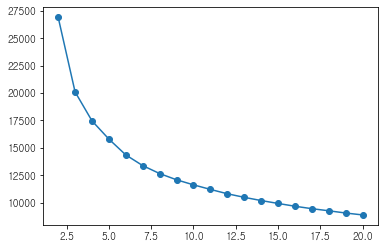

,No,Inertia,Gap
0,2,26912.373522,0.000000
1,3,20105.690201,6806.683321
2,4,17465.678988,2640.011213
3,5,15802.064482,1663.614506
4,6,14359.531587,1442.532895
5,7,13385.240466,974.291122
6,8,12662.027927,723.212538
7,9,12092.232653,569.795274
8,10,11633.320522,458.912131
9,11,11216.627413,416.693109


In [5]:
# 군집분석 함수 호출
kmeans2, kmeans3, kmeans4, kmeans5, kmeans6, kmeans7, kmeans8, kmeans9, kmeans10, kmeans11,kmeans12,kmeans13, kmeans14, kmeans15, kmeans16, kmeans17, kmeans18, kmeans19, kmeans20 = cluster_learn(ana_data)

# 최적의 군집수 찾기
sse, sseDF = elbow_search()

# elbow Graph 그리기 
plt.plot(range(2,21), sse, marker='o')
plt.show()
sseDF

### 2.1.2 K-means 군집분석 결과 군집별 count 시각화

C:\Users\Administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시간_시작마감,매수종목개수_Scale,매수체결건수_Scale,kmeans6
166999,0.476909,0.465292,0.112977,0.895596,0.361617,0.338012,5


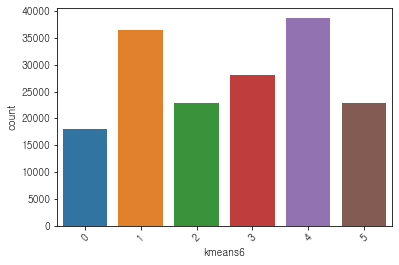

In [6]:
# 군집분석 결과 Labeling
k_data = ana_data
k_data['kmeans6'] = kmeans6.labels_
k_data.kmeans6.astype('category')

# 그룹별 count Bar 그래프 
plt.xticks(rotation=45)
sns.countplot('kmeans6', data=k_data)

k_data.tail(1)

## 2.2 DBSCAN 군집분석
    - Initial Parameter 찾기 

In [ ]:
# 모든 포인트에 대하여 K 번쨰 가까운 포인트와의 거리 계산
from  sklearn.neighbors import NearestNeighbors
k = 100
neigh = NearestNeighbors(n_neighbors=k+1)
nbrs = neigh.fit(ana_data)

In [ ]:
distance, indices = nbrs.kneighbors(near_data)

In [ ]:
# Elbow Point 찾기 
eps = sorted(np.array(distance).T[100], reverse = True)
idx = sorted(np.array(indices).T[0])
plt.plot(idx, eps)

### 2.2.1 eps / min_sample 초기값 찾아서 DBSCAN fitting

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=100)
clusters = dbscan.fit_predict(ana_data)

In [ ]:
# 결과 확인 
print(np.unique(clusters))

print('NOISE 개수 :', len([x for x in clusters if x ==-1]))

In [ ]:
silhouette_score(near_data, clusters)

## 2.3 Spectral Clustering 수행
    - 계산량이 가장 많은 Clustering 기법 (Graph based)

In [167]:
sp_ml = SpectralClustering(n_clusters=6, n_init=12, affinity='nearest_neighbors', n_neighbors=12).fit_predict(ana_data)

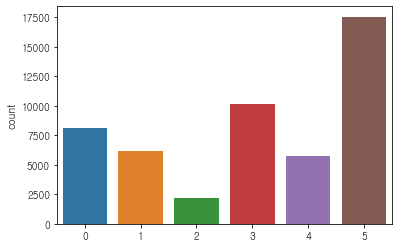

In [169]:
sns.countplot(sp_ml2)

### 2.3.1 결과값 Labeling

In [ ]:
sp_data = ana_data
sp_data['sp_ml'] = sp_ml

## 3. 결과값 해석을 위한 데이터 셋 생성 
    - 군집 결과를 One-Hot-Encoding 하여 군집결과 해석을 위한 데이터셋 생성 

In [177]:
# DUMMY 변수화 (종목개수_구분코드)
df_dummy_a = pd.get_dummies(sp_data['sp_ml'],prefix='GRP')
sp_data = pd.merge(sp_data, df_dummy_a, left_index=True, right_index=True, how='left')

sp_data

,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시간_시작마감,매수체결금액_s,매수종목개수_s,매수체결건수_s,sp_ml2,GRP_0,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5
0,0.373047,0.891303,0.819262,0.828158,1.000000,0.705387,1.000000,3,0,0,0,1,0,0
1,0.163694,0.810479,0.796233,0.822215,0.823635,0.634746,1.000000,3,0,0,0,1,0,0
2,0.432890,0.684687,0.854459,0.853347,0.821968,0.802887,0.801560,3,0,0,0,1,0,0
3,0.321450,0.669123,0.978100,0.854172,0.815004,0.830689,0.807771,3,0,0,0,1,0,0
4,0.182421,0.227867,0.869783,0.849071,0.811257,0.801227,0.805603,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.054199,0.530718,0.623593,0.877744,0.541045,0.429811,0.385117,5,0,0,0,0,0,1
49996,0.321005,0.065377,0.449365,0.814152,0.541044,0.509547,0.511732,1,0,1,0,0,0,0
49997,0.587682,0.516736,0.951842,0.883568,0.541043,0.564939,0.518205,0,1,0,0,0,0,0
49998,0.308842,0.362807,0.709383,0.913871,0.541041,0.460949,0.522772,5,0,0,0,0,0,1


### 3.1 수익률 데이터와 합치기 

In [193]:
sp_data = pd.concat([sp_data, data['최종수익률(실현+평가)'] ], axis=1)
sp_data

,증권거래소매수체결비율,거래대금500억이상매수체결비율,양봉매수체결비율,매수체결시간_시작마감,매수체결금액_s,매수종목개수_s,매수체결건수_s,GRP,GRP_0,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,최종수익률(실현+평가)
0,0.373047,0.891303,0.819262,0.828158,1.000000,0.705387,1.000000,2,0,0,1,0,0,0,0.440352
1,0.163694,0.810479,0.796233,0.822215,0.823635,0.634746,1.000000,2,0,0,1,0,0,0,0.459940
2,0.432890,0.684687,0.854459,0.853347,0.821968,0.802887,0.801560,2,0,0,1,0,0,0,0.334142
3,0.321450,0.669123,0.978100,0.854172,0.815004,0.830689,0.807771,2,0,0,1,0,0,0,0.241567
4,0.182421,0.227867,0.869783,0.849071,0.811257,0.801227,0.805603,0,1,0,0,0,0,0,0.129761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.054199,0.530718,0.623593,0.877744,0.541045,0.429811,0.385117,0,1,0,0,0,0,0,0.093524
49996,0.321005,0.065377,0.449365,0.814152,0.541044,0.509547,0.511732,4,0,0,0,0,1,0,7.862754
49997,0.587682,0.516736,0.951842,0.883568,0.541043,0.564939,0.518205,5,0,0,0,0,0,1,-2.241123
49998,0.308842,0.362807,0.709383,0.913871,0.541041,0.460949,0.522772,0,1,0,0,0,0,0,-0.326677


In [197]:
temp = temp_dsc
for i in range(1,6):
    i_data= data[data['GRP']==i]
    temp_dsc = pd.DataFrame(i_data['최종수익률(실현+평가)'].describe())
    temp = pd.concat([temp, temp_dsc], axis=1)
    
temp.columns=['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6']

In [200]:
temp

,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6
count,16990.000000,6175.000000,9404.000000,2453.000000,6377.000000,8601.000000
mean,0.404888,0.853467,-0.292940,1.143914,1.162707,0.459997
std,3.335506,6.319191,2.443335,5.022930,6.202635,3.058507
min,-32.743272,-56.816260,-35.805671,-52.644929,-48.359440,-39.109616
25%,-0.739093,-0.826830,-0.992410,-0.538104,-0.806404,-0.747652
50%,0.037376,0.361795,-0.418440,0.713373,0.459641,0.070681
75%,1.075480,2.102773,0.090724,2.553076,2.414797,1.204786
max,81.169950,225.892235,76.400277,80.498034,143.785511,57.277619


### 3.2 데이터 저장하기 

In [165]:
sp_data.to_csv('sp_data_0924_2.sql', encoding='euc-kr', index = False)